# **Chapter 2**   
# **Data and sampling Distributions**

## **Random Sampling**
### **Sample**: A portion of the overall population usually taken when it is either too difficult to obtain or process statistics i=on the entire Dataset.
### **Population**: A population is the pool of individuals from which a statistical sample is drawn for a study.
### **Stratified Sampling**: Stratified sampling allows researchers to obtain a sample population that best represents the entire population being studied. 
### **Sample Bias**: A sample that misrepresent the population. For example, polling one state in India when you want to understand the political leaning of the entire country

 

** **

## **Selection Bias**
#### **Selection Bias** : Bias that results from how observation in data are selected
### **Data Snooping** : Searching through data in order to find something intresting, Basically EDA.
### **Vast Search Effects**: A form of selection bias where one repeteadly runs different models asking different questions on a large dataset which increases the chances that an outlier deemed interesting. To prevent this, it is important that you split apart a section of the data so that you have a section that you are not looing at prior to modeling that you can test your model on(test set)


In [19]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image


In [3]:
df = pd.read_csv("players_20.csv")
df.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [4]:
for i in df.columns: # Printing Every single Column 
    print(i)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

## **Sampling Distribution of a Statistics**
  When working with large amounts of data, sampling becomes very important, and since a sample is not a perfect representation of the population, it is important to understand *sampling variability*.
  
 
  Data distribution are the frequency distribution of individual values in a dataset.
  A **Sampling Distributio** is a combination of sampling *sampling statistics* and *data distribution*.

### **Central limit Theorem**: The means drawn from multiple samples from the data when plotted, will resembles a bell-shaped normal curve. We can demonstrate this by taking the means of multiple samples of 5 or 20 items and plotting them on a bar chart.

<AxesSubplot:>

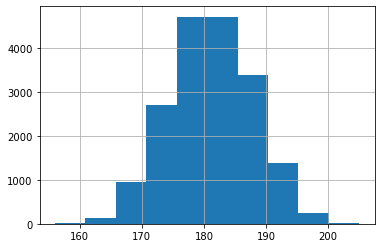

In [16]:
df['height_cm'].hist()

Text(0.5, 1.0, 'Central Limit Theorem')

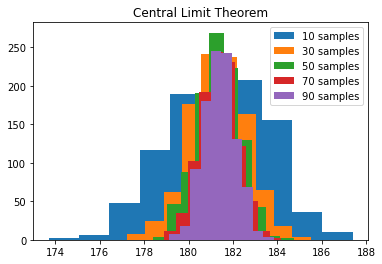

In [5]:
sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples=[]
    for i in range(1000):
        samples.append(df["height_cm"].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem") 

**Standard Error**: Single metric that sums up the variability in the sampling distributing for a statistics. Yoou can estimate the syandar error based on the standard deviation *s* and the number of vakues in the sample *n*.

In [6]:
df["height_cm"].sem()

0.04997894669491691

**The Bootstrappping** : Bootstrapping is sampling with replacement from observed data to estimate the variability in a statistic of interest. See also permutation tests, a related form of resampling.



In [7]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(df["height_cm"])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics: ')
print(f'original: {df["height_cm"].mean()}')
print(f'bias: {results.mean() - df["height_cm"].mean()}')
print(f'std. error: {results.std()}') 

Bootstrap Statistics: 
original: 181.36218404639456
bias: -0.0020271911596125847
std. error: 0.04800219314892793


In [8]:
results.mean()

181.36015685523495

## **Confidence Interval**

**Confidence Level**: The percentage of confidence intervals constructed in the same way from the same population that are expected to contain the satatistics of interest.

**Confidence Intervals**: The interval that contains x% of the bootstrapped sample statistic you are gathering yoou can calculate this using this mrthodology:
 
 1. Draw a random sample of size *n* with replacement (bootstrapiing)vfrom the data
 
 2. Record your sample statistic (mean, media etc)

 3. Repeat step 1 and 2 multiple times

 4. For an x% confidence interval, trim[(100-*x*)/2]% results off the ends of the distribution 

In [9]:
import numpy as np
import scipy.stats as st
#define sample data 
data = df["height_cm"][:20]
#create 95% confidence interval for population mean height
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(177.9922472187092, 185.30775278129082)

In [10]:
#define sample data 
# trying to achieve more accurate confidence interval
np.random.seed(0)
data = df["height_cm"].sample(2000)
#create 95% confidence interval for population mean height
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(181.0821170717638, 181.6748829282362)

## **Normal/Gaussian Distribution** 

**Error**:  Difference between an instance and a predicted average value

**Standardize**:  Method of scaling data up or down such that you can compare it to a normal distribution

**Z-score**:  Refer to the number of standard deviations above or below the mean that the value is.

**QQ Plot**: QQ Plots (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.
 
*How to make a QQ plots*
1. Order the items from smallest to largest
2. Draw a normal distribution curve
3. Find the z-value(cut-off point) for each segment
4. Plot your data set values (Step 1) against your normal distribution cut-off points.

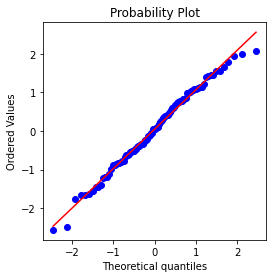

In [12]:
from scipy import stats

fig,ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample,plot=ax); 
# this is an example of how a qqplot would look

**Lets try on our football data**

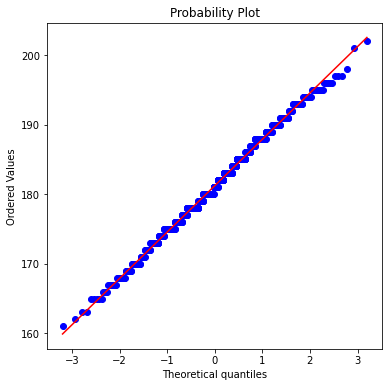

In [18]:

fig,ax = plt.subplots(figsize=(6,6))
norm_sample = df['height_cm'].sample(1000)
stats.probplot(norm_sample,plot=ax);

### **Long-Tailed Distribution**

Most data have sokme sort of skew whether to the left or right. Data that is skewed to the right includes things llike income in the united states.

<img src="longtailed.png" alt="drawing" width="500"/>

### **Student's t-Distribution**

A normal distribution with thicker and longer tails. this is the distribution that sample statistics tend to follow. As you take more samples, the distributoin will more closely resembles a normal distribution.

<img src="f126.png" alt="drawing" width="500"/>

It is called the Student's T-Distribution becausse W.S. Gosset, its creator was employed by the Guinness Brewery at the time od its creation and they did not want people knowing they were using statistical mrthods in their brewing so he published under the name *Student*.

### **Binomial Distribution**

Binomial distribution are important in Data Science as a lot of usecase for data sciences are binomial, buy/dont buy, survive/die, click/dont click etc. 
We can use it to answer the questions of how many successes do you expect given a certain number of trials and a certain probability of success. 

The probability mass function(PMF) tells us the probability that an event will happen a certain number of times given a certain number of samples and probabilty for success while a Cumulative Density Funtion or CDF tells us the probsbility that an even will happen a certain number or fewer times.


In [25]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.0729
0.99144


In the above example
* 2= Number of success we would like
* 5= No. of trials we are conducting
* 0.1= Probability of success in each trial is 0.1
